# 엘모(Embeddings from Language Model, ELMo)

### biLM의 활용

#### 1) 각 층의 출력값을 연결(concatenate)한다.

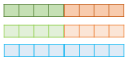

#### 2) 각 층의 출력값 별로 가중치를 준다.

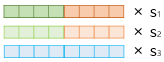

#### 3) 각 층의 출력값을 모두 더한다.

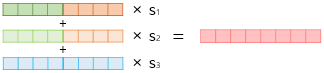

#### 4) 벡터의 크기를 결정하는 스칼라 매개변수를 곱한다.



### ELMo 표현을 사용해서 스팸 메일 분류하기

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.python.keras.backend as K

In [2]:
tf.__version__

'2.0.0'

In [3]:
hub.__version__

'0.7.0'

In [4]:
sess = tf.compat.v1.Session()
K.set_session(sess)
# 세션 초기화. 이는 텐서플로우 개념.

In [22]:
elmo = hub.Module("https://tfhub.dev/google/elmo/3")
# 텐서플로우 허브로부터 ELMo를 다운로드

RuntimeError: variable_scope module_8/ was unused but the corresponding name_scope was already taken.

In [6]:
sess.run(tf.initialize_all_variables())
sess.run(tf.tables_initializer())

AttributeError: module 'tensorflow' has no attribute 'initialize_all_variables'

In [7]:
import pandas as pd
data = pd.read_csv('C:/Users/it/Downloads/dataset/spam.csv', encoding='latin-1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
y_data = list(data['v1'])
X_data = list(data['v2'])

In [9]:
X_data[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [10]:
print(y_data[:5])

[0, 0, 1, 0, 0]


In [11]:
print(len(X_data))
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

5572
4457
1115


In [12]:
import numpy as np
X_train = np.asarray(X_data[:n_of_train]) #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = np.asarray(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4457개의 데이터만 저장
X_test = np.asarray(X_data[n_of_train:]) #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = np.asarray(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장

In [13]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]
# 데이터의 이동이 케라스 → 텐서플로우 → 케라스가 되도록 하는 함수

In [14]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


NameError: name 'elmo' is not defined

In [ ]:
history = model.fit(X_train, y_train, epochs=1, batch_size=60)

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))